In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('steel_industry_data.csv')
df.info()
#no null values in any col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [4]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


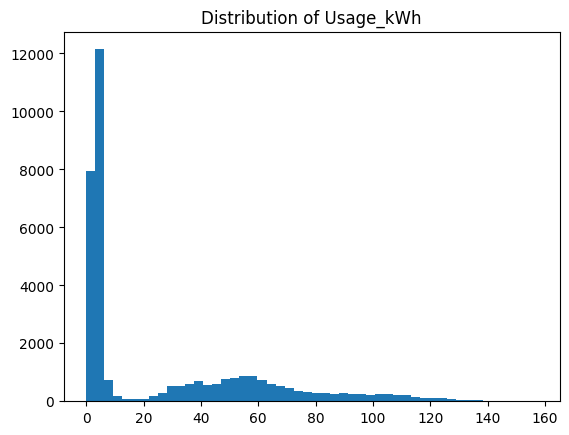

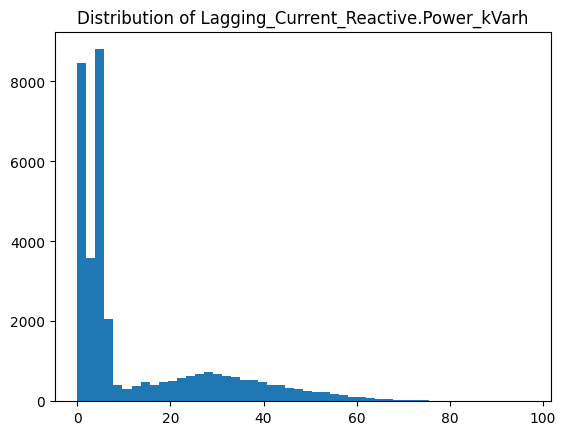

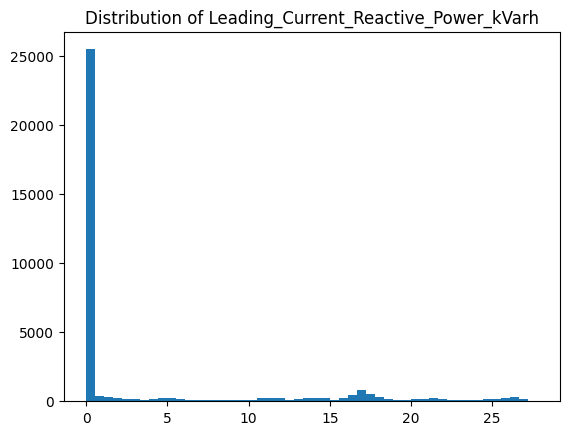

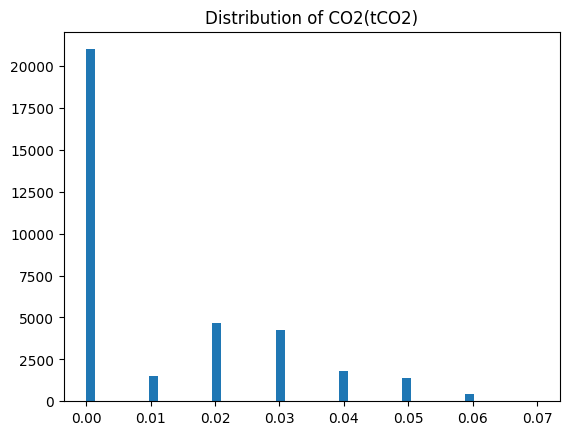

In [58]:
cols = [
    'Usage_kWh',
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'CO2(tCO2)'
]

for col in cols:
  plt.figure()
  plt.hist(df[col], bins=50)
  plt.title(f'Distribution of {col}')
  plt.show()

  #highly right skewed data

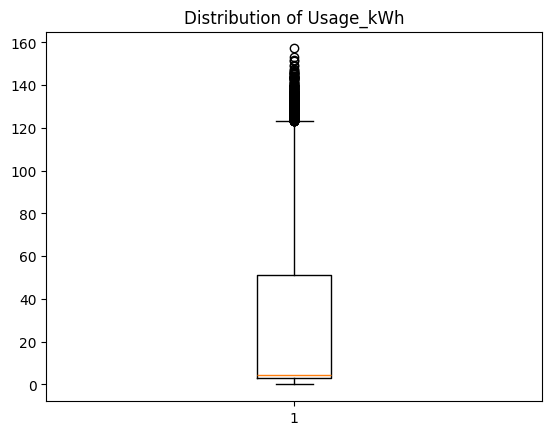

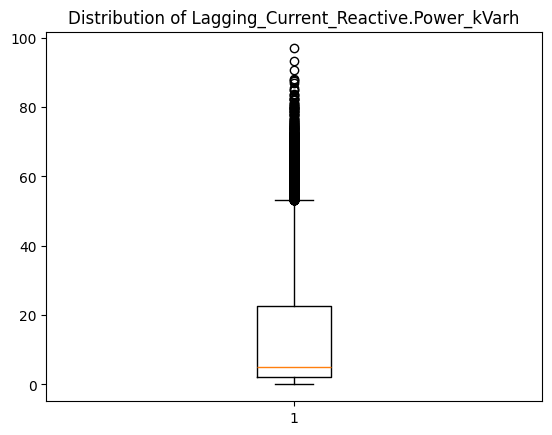

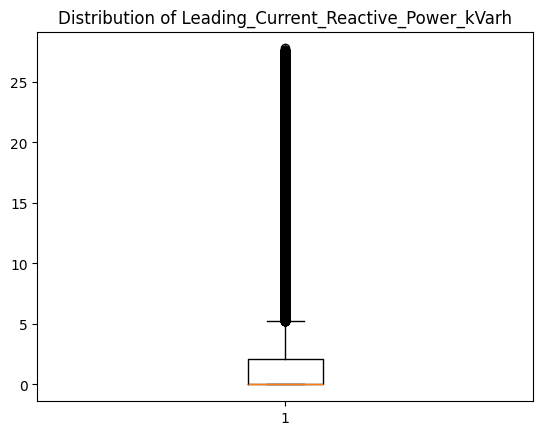

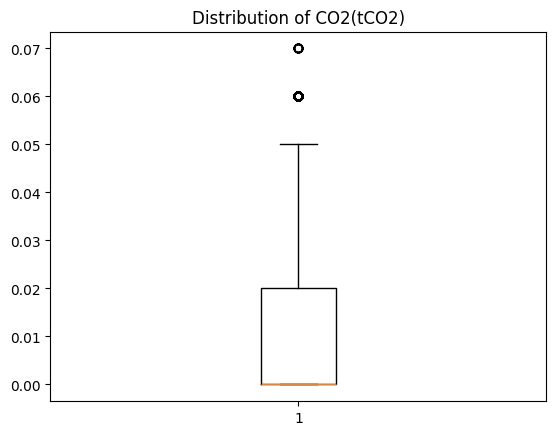

In [59]:
for col in cols:
  plt.figure()
  plt.boxplot(df[col])
  plt.title(f'Distribution of {col}')
  plt.show()

  #same here the data is right skewed

In [60]:
for col in cols:
  print(f"Skewness for {col}:", df[col].skew())

  #confirmed numerically as well

Skewness for Usage_kWh: 1.197393822769221
Skewness for Lagging_Current_Reactive.Power_kVarh: 1.4378993331359438
Skewness for Leading_Current_Reactive_Power_kVarh: 1.7343137431298614
Skewness for CO2(tCO2): 1.1493545066570046


In [61]:
features = [
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'NSM'
]

x = df[features]
y = df['Usage_kWh']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

linReg = LinearRegression()
linReg.fit(x_train, y_train)

y_pred = linReg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("R²:", r2_score(y_test, y_pred))

MSE: 102.29007851107968
R²: 0.9100131359176624


In [62]:
rmse = mse ** 0.5
print(rmse)

#thats 10kwH of error but my 75% of data is below 51kwh so thats a terrible rmse

10.113855768750101


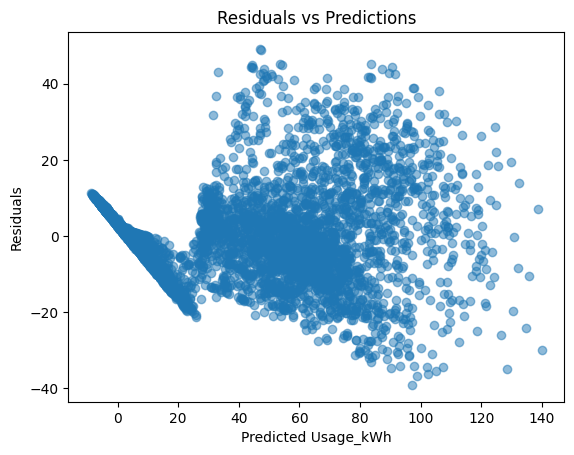

In [63]:
plt.figure()
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.xlabel("Predicted Usage_kWh")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions")
plt.show()


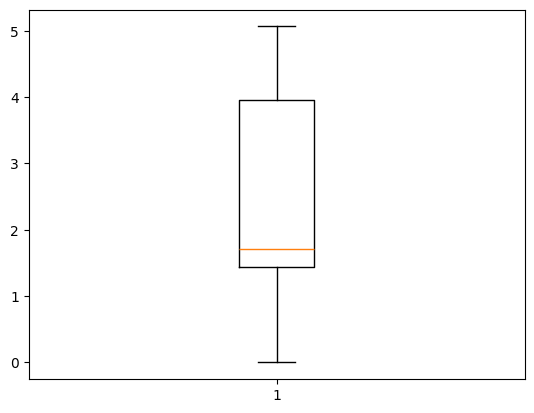

In [64]:
#updated data with log to reduce skewness
y_log = np.log1p(df['Usage_kWh'])
plt.boxplot(y_log)
plt.show()

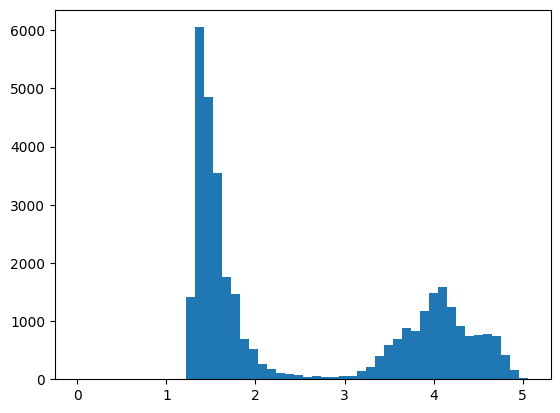

In [65]:
plt.hist(y_log, bins = 50)
plt.show()

In [66]:
x_new = df[features]
y_new = y_log

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(
    x_new, y_new, test_size=0.2, random_state=42
)

linReg_new = LinearRegression()
linReg_new.fit(x_train_new, y_train_new)

y_pred_log_new = linReg_new.predict(x_test_new)

mse_new = mean_squared_error(y_test_new, y_pred_log_new)

print("MSE:", mse_new)
print("R²:", r2_score(y_test_new, y_pred_log_new))
# metrics in log space

MSE: 0.09636799755833551
R²: 0.9420508961509316


In [67]:
y_pred_new = np.expm1(y_pred_log_new)
y_true_new = np.expm1(y_test_new)

rmse_new = np.sqrt(mean_squared_error(y_true_new, y_pred_new))
print("RMSE after log transform:", rmse_new)
# higher than the previous rmse but more realistic

RMSE after log transform: 17.760302977652632


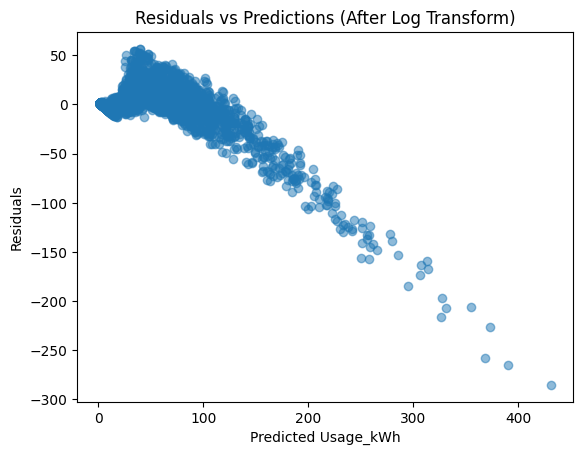

In [68]:
residuals = y_true_new - y_pred_new

plt.figure()
plt.scatter(y_pred_new, residuals, alpha=0.5)
plt.xlabel("Predicted Usage_kWh")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions (After Log Transform)")
plt.show()

#on high values the the residuals are highly negative this is bias not noise

In [74]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RF RMSE:", rmse_rf)
#random forest fits this data so well because random forest handles non linearity well

RF RMSE: 0.6291283423042885


In [78]:
rf = RandomForestRegressor(
    n_estimators=350,
    random_state=42,
    n_jobs=-1
)

rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RF RMSE:", rmse_rf)
#random forest fits this data so well because random forest handles non linearity well

RF RMSE: 0.6213319179196236
